In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
%%writefile DataLoader3.py

import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def load_and_resize_image(image_path, target_size):
    """
    Load and resize an image to the target size.

    Args:
    - image_path (str): Path to the image file.
    - target_size (tuple): Target size for resizing.

    Returns:
    - np.array: Resized image as a numpy array.
    """
    try:
        # Open the image using PIL
        image = Image.open(image_path)
        # Resize the image
        resized_image = image.resize(target_size)
        # Convert the image to numpy array
        image_array = np.array(resized_image)
        return image_array
    except Exception as e:
        print(f"Error loading or resizing image {image_path}: {e}")
        return None

def load_images_from_class(class_name, folder_path, num_images=100, target_size=(224, 224)):
    """
    Load and resize images from a specified class folder.

    Args:
    - class_name (str): Name of the class.
    - folder_path (str): Path to the folder containing images for the class.
    - num_images (int): Number of images to load (default is 100).
    - target_size (tuple): Target size for resizing (default is (224, 224)).

    Returns:
    - list: List of loaded and resized images.
    """
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder does not exist for class {class_name}: {folder_path}")
        return []
    
    # Get a list of all files (images) in the folder
    all_images = os.listdir(folder_path)
    
    # Check if there are images in the folder
    if not all_images:
        print(f"No images found in the folder for class {class_name}: {folder_path}")
        return []

    # Randomly select num_images images
    selected_images = random.sample(all_images, num_images)

    # List to store the loaded and resized images
    loaded_images = []

    # Load and resize the images
    for image_name in selected_images:
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, image_name)
        # Load and resize the image
        image_array = load_and_resize_image(image_path, target_size)
        if image_array is not None:
            loaded_images.append(image_array)

    return loaded_images

def visualize_images(images, class_name):
    """
    Visualize a list of images.

    Args:
    - images (list): List of images (PIL Image objects).
    - class_name (str): Name of the class.
    """
    num_images = len(images)
    if num_images == 0:
        print(f"No images to visualize for class {class_name}")
        return

    # Visualize the first 10 images
    for i in range(min(10, num_images)):
        plt.subplot(2, 5, i+1)  # Creating subplots with 2 rows and 5 columns
        plt.imshow(images[i])
        plt.axis('off')  # Turn off axis
        plt.title(f"Class: {class_name}")  # Set title
    plt.show()

    print(f"Number of images loaded for class {class_name}: {num_images}")

def load_images_from_selected_classes(selected_classes, base_folder_path, num_images_per_class=100, target_size=(224, 224)):
    """
    Load and resize images from selected classes in the dataset.

    Args:
    - selected_classes (list): List of class names to load images from.
    - base_folder_path (str): Path to the base folder containing class folders.
    - num_images_per_class (int): Number of images to load per class (default is 100).
    - target_size (tuple): Target size for resizing (default is (224, 224)).

    Returns:
    - dict: Dictionary containing loaded and resized images for each selected class.
    """
    loaded_images_dict = {}

    for class_name in selected_classes:
        folder_path = os.path.join(base_folder_path, class_name)
        loaded_images = load_images_from_class(class_name, folder_path, num_images_per_class, target_size)
        loaded_images_dict[class_name] = loaded_images

    return loaded_images_dict

Overwriting DataLoader3.py


In [3]:
def visualize_images(images, class_name):
    """
    Visualize a list of images.

    Args:
    - images (list): List of images (PIL Image objects).
    - class_name (str): Name of the class.
    """
    num_images = len(images)
    if num_images == 0:
        print(f"No images to visualize for class {class_name}")
        return

    # Visualize the first 10 images
    for i in range(min(10, num_images)):
        plt.subplot(2, 5, i+1)  # Creating subplots with 2 rows and 5 columns
        plt.imshow(images[i])
        plt.axis('off')  # Turn off axis
        plt.title(f"Class: {class_name}")  # Set title
    plt.show()

    print(f"Number of images loaded for class {class_name}: {num_images}")

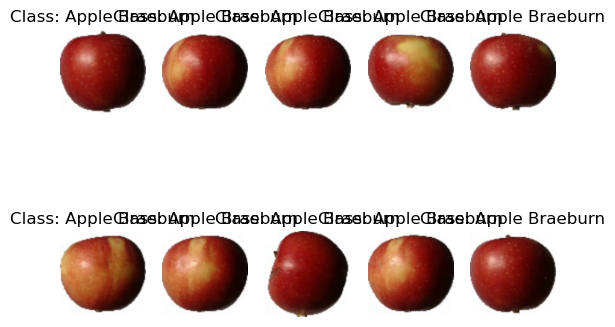

Number of images loaded for class Apple Braeburn: 100


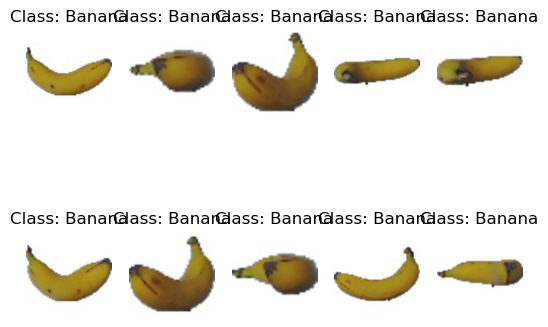

Number of images loaded for class Banana: 100


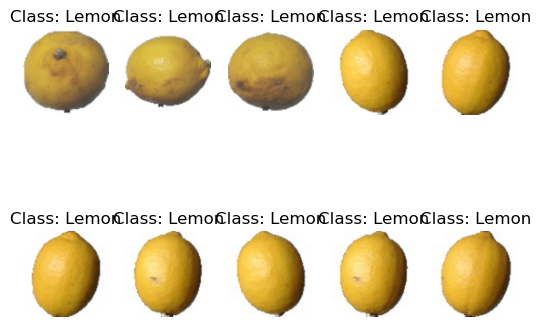

Number of images loaded for class Lemon: 100


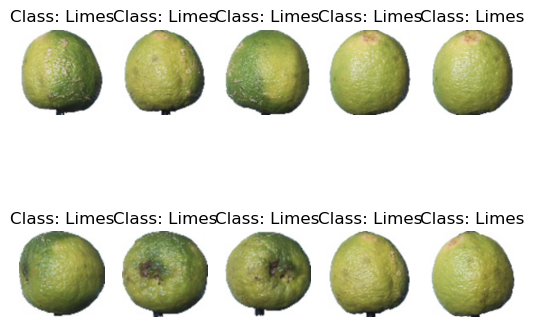

Number of images loaded for class Limes: 100


In [10]:
# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Visualize the loaded images for each class
for class_name, images in loaded_images_dict.items():
    visualize_images(images, class_name)